# <center> Data Preprocessing <center>

# First analysis and cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data= pd.read_csv("creditcard_train.csv")
#data= pd.read_csv("C:\\Users\\fabio\\Desktop\\Optimization for machine learning\\Project\\creditcard_train.csv")
#data= pd.read_csv("C:\\Users\\Marcus\\Desktop\\optimization\\creditcard_train(1).csv")

check veloce se ci sono valori Nan o Null


In [2]:
data.isnull().sum().max() == 0 and print("Ok, no null")

data.head()

Ok, no null


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,60912,-0.233511,0.984915,-0.611675,-0.075994,2.158329,3.510300,-0.343637,1.329678,-0.826094,...,-0.140486,-0.691467,0.103120,0.949679,-0.302735,-0.598823,-0.030971,-0.015685,5.28,0
1,40081,-1.311630,0.711942,2.394713,1.633830,-1.075717,0.879474,-1.300819,-2.273884,0.334474,...,-1.128392,1.096584,-0.206914,0.382391,0.354476,0.060012,0.165756,0.091752,67.28,0
2,172483,-6.665007,5.932474,-3.263947,-1.937417,-0.663620,-1.021324,0.416578,0.721296,4.914028,...,-0.832972,-0.015136,-0.068249,-0.601072,1.038958,0.537823,1.473408,0.244139,4.79,0
3,148273,0.087023,0.743134,-0.306746,-1.062374,1.219576,0.218063,0.783998,0.133818,-0.167569,...,-0.292027,-0.754572,-0.038569,-0.371665,-0.373884,0.155175,0.234361,0.082252,0.89,0
4,168490,1.992767,-0.303564,-1.005669,0.334015,-0.111596,-0.529842,-0.107892,-0.203797,1.047071,...,0.001227,0.151379,0.058258,-0.638222,0.017743,-0.322144,0.009814,-0.043051,43.03,0


ANALYZING CLASSES DISTRIBUTION

No handles with labels found to put in legend.


Frauds =  0.1705414691645976 %
No Frauds =  99.8294585308354 %


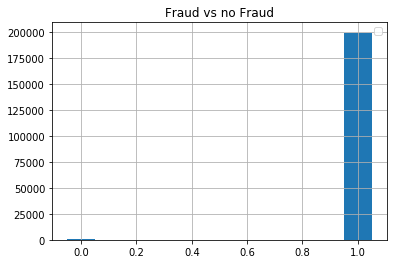

In [3]:
count=0
for i in data.Class:
    if (i==1):
        count+=1
        
frauds=count/len(data.Class)
nofrauds=1-frauds
print("Frauds = ",frauds*100,"%\nNo Frauds = ",nofrauds*100,"%")
indices_frauds=[i for i, j in enumerate(data.Class) if j == 1]
indices_nofrauds=[i for i, j in enumerate(data.Class) if j == 0]
# sns.countplot('Class', data=data)
# plt.title('No Fraud vs Fraud')
plt.bar(height=[count,len(data)-count],x=(0,1),width=0.1)
plt.title('Fraud vs no Fraud')
plt.grid()
plt.legend()

essendo fortemente sbilanciato, non possiamo usare l'accuracy perchè anche sbagliassimo tutto avremmo comunque una percentuale di successo sopra al 99%

ANALIZING NO PRIVATE FEATURES (TIME AND AMOUNT)

Text(0.5, 1.0, 'Distribution of Transaction Time')

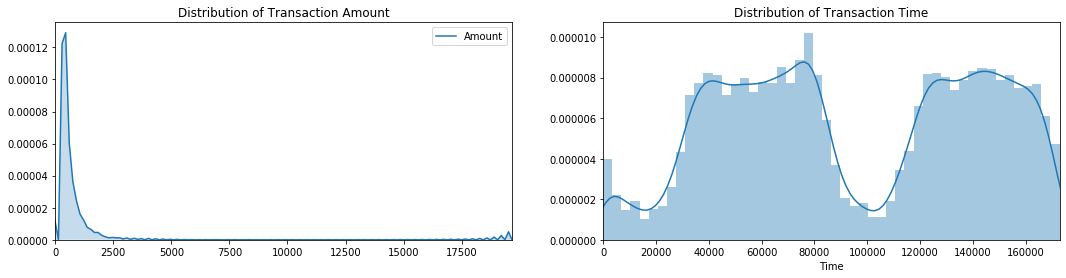

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
# sns.distplot(data.Amount,ax=ax[0])
sns.kdeplot(data.Amount,ax=ax[0],shade=True)    #estimate density
ax[0].set_xlim([min(data.Amount), max(data.Amount)])
# ax[0].set_xlim([min(data.Amount), 2000])    #to visualize better
ax[0].set_title('Distribution of Transaction Amount')

sns.distplot(data.Time,ax=ax[1])
ax[1].set_xlim([min(data.Time), max(data.Time)])
ax[1].set_title('Distribution of Transaction Time')

# Assumendo che il tempo 0 sia notturno, possiamo notare come le transizioni siano principalmente diurne come ci si può facilmente aspettare
# N.B. SAREBBE UTILE RIUSCIRE A VEDERE SE C'è CORRELAZIONE TRA LE FRODI E QUESTE CARATTERISTICHE

ANALIZING CORRELATIONS ON THE ENTIRE DATAFRAME

In [5]:
pos=(data.corr().Class)>0.3
neg=(data.corr().Class)<-0.3
corr=np.bitwise_or(pos,neg)
print([i for i, j in enumerate(corr) if j == True])

[14, 17, 30]


grafically we can use heatmap

,Time,V2,V4,V10,V11,V12,V14,V17,Amount,Class
0,60912,0.984915,-0.075994,-0.281273,-0.359628,-0.050099,0.716348,-0.609476,5.28,0
1,40081,0.711942,1.633830,-0.975677,-1.568232,-0.537668,0.056247,0.673775,67.28,0
2,172483,5.932474,-1.937417,7.010639,0.942902,0.248599,-3.246715,0.629593,4.79,0
3,148273,0.743134,-1.062374,-0.231108,-0.293209,0.170051,0.326547,-1.047422,0.89,0
4,168490,-0.303564,0.334015,-0.145995,-1.380885,0.516791,-0.028412,-0.717062,43.03,0


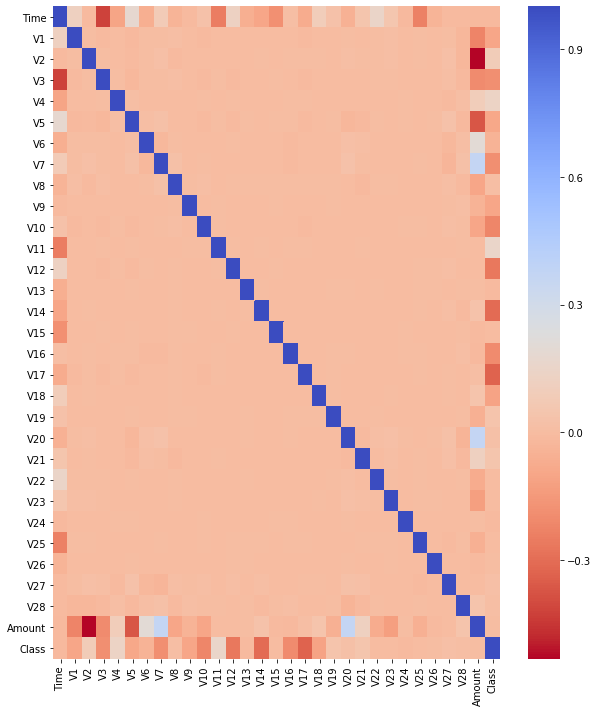

In [6]:
f= plt.subplots(figsize=(10,12))
sns.heatmap(data.corr(), cmap='coolwarm_r') #corr = Compute pairwise correlation of columns, excluding NA/null values.

# Guardando le correlazione della classe (ultima colonna) si vede una correlazione negativa con V10,V12,V14,V17 
# e una positiva con V2,V4,V11 
# per cui tutte le altre features si possono ignorare perchè sembrano non avere un legame con l'essere o meno una frode
new_data = data.drop(['V1','V3','V5','V6','V7','V8','V9','V13','V15','V16','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'],axis=1)
new_data.head()

# Balancing dataset

Using centroid technique to undersample the 0 class.

In [7]:
from imblearn.under_sampling import ClusterCentroids
from sklearn.model_selection import train_test_split
x=data.drop(['Class'],axis=1)
y=data.Class

cc = ClusterCentroids(sampling_strategy=0.65, random_state=0)
X_new, y_new = cc.fit_resample(x, y)
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.2,random_state=0,stratify=y_new)

Using TensorFlow backend.


KeyboardInterrupt: 

CORRELATION ON DATAFRAME USING CENTROID TECHNIQUE

In [ ]:
# NEL CASO VOLESSIMO USARE UN DATAFRAME BILANCIATO PER LA CLASSE
#data_shuffle = data.sample(frac=1)
#fraud_frame = data.loc[data.Class == 1]
#nonfraud_frame = data.loc[data.Class == 0][:count]
balanced_data = pd.concat([X_new, y_new], axis = 1)

pos=(balanced_data.corr().Class)>0.7
neg=(balanced_data.corr().Class)<-0.7
corr=np.bitwise_or(pos,neg)
print("Features we can assume are highly correlated = ",[i for i, j in enumerate(corr) if j == True])

# CORRELATION ON THIS BALANCED DATAFRAME
f= plt.subplots(figsize=(10,12))
sns.heatmap(balanced_data.corr(), cmap='coolwarm_r', annot_kws={'size':20})
# balanced_data.corr()['Class'].abs().sort_values().keys()
# si vede la stessa cosa di prima però in maniera molto più evidente e in più si accenna una leggera correlazione tra classe e time/amount ma credo sia trascurabile

# PCA Analysis

Trying to do PCA-based dimensionality reduction for visualization

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
features=list(data.columns.values[0:-1])
label=list(data.columns.values[30:31])
X = data.loc[:, features].values
y = data.loc[:, label].values
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, data[label]], axis = 1)
finalDf.head()

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
classes = [0, 1]
colors = ['r', 'b']
for clas, color in zip(classes,colors):
    indicesToKeep = finalDf['Class'] == clas
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(classes)
ax.grid()
print(pca.explained_variance_ratio_)

PCA does not show anything relevant. I try to eliminate "Time" feature. Reduced variability of positives is due to CLT

In [ ]:
features=list(data.columns.values[1:-1])
label=list(data.columns.values[30:31])
X = data.loc[:, features].values
y = data.loc[:, label].values
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, data[label]], axis = 1)
finalDf.head()

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
classes = [0, 1]
colors = ['r', 'b']
for clas, color in zip(classes,colors):
    indicesToKeep = finalDf['Class'] == clas
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(classes)
ax.grid()
print(pca.explained_variance_ratio_)

Excluding outliers clusters appear however superimposed to each other. Trying to eliminate "Amount" too.

In [ ]:
features=list(data.columns.values[1:-2])
label=list(data.columns.values[30:31])
X = data.loc[:, features].values
y = data.loc[:, label].values
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, data[label]], axis = 1)
finalDf.head()

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
classes = [0,1]
colors = ['r', 'b']
for clas, color in zip(classes,colors):
    indicesToKeep = finalDf['Class'] == clas
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(classes)
ax.grid()
print(pca.explained_variance_ratio_)

Not successful..

Trying to consider features with strong differences in means betweeen 0 and 1

In [ ]:
ones = data[data['Class'] == 1]
ones.head()
ones.hist(figsize = (25,25))
new_features = list(ones.describe().loc['mean',:].abs().sort_values().keys()[-9:-2])
print(new_features)

In [ ]:
zeros = data[data['Class'] == 0]
zeros.head()
zeros.hist(figsize = (25,25))
plt.show()

In [ ]:
features = new_features
label=list(data.columns.values[30:31])
X = data.loc[:, features].values
y = data.loc[:, label].values
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, data[label]], axis = 1)
finalDf.head()

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
classes = [0,1]
colors = ['r', 'b']
for clas, color in zip(classes,colors):
    indicesToKeep = finalDf['Class'] == clas
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(classes)
ax.grid()
print(pca.explained_variance_ratio_)

Explained variance increases(obviously)but clusters start to slowly separate

TO DO: eliminare ulteriori features(con cautela)sperando in un ulteriore miglioramento della situazione. Farlo con il dataset bilanciato.

In [ ]:
features = list(balanced_data.columns.values[0:-1])
label=list(balanced_data.columns.values[30:31])
X = balanced_data.loc[:, features].values
y = balanced_data.loc[:, label].values
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, data[label]], axis = 1)
finalDf.head()

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
classes = [0,1]
colors = ['r', 'b']
for clas, color in zip(classes,colors):
    indicesToKeep = finalDf['Class'] == clas
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(classes)
ax.grid()
print(pca.explained_variance_ratio_)

PCA on reduced dataset not working...NaN values on class 1. WHY?

Keep working on full dataset removing features. Use the ones that show high correlations and the most significative according to the previous criterion

In [ ]:
new_features = ['V14', 'V3','V17', 'V12','V10','V11','V4','V1']
#new_features = ['V14','V3','V17','V12']
label=list(data.columns.values[30:31])
X = data.loc[:, new_features].values
y = data.loc[:, label].values
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, data[label]], axis = 1)
finalDf.head()

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
classes = [0,1]
colors = ['r', 'b']
for clas, color in zip(classes,colors):
    indicesToKeep = finalDf['Class'] == clas
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(classes)
ax.grid()
print(pca.explained_variance_ratio_)

This seems to be the best compromise